In [1]:
import yfinance as yf
import pandas as pd
import glob
import re

In [20]:
ticker_regex = re.compile(r'\((.*):(.*)\)')
date_regex = re.compile(r'(\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s+\d{1,2},\s+\d{4}\b)')
quarter_regex = re.compile(r'(Q[1-4] 202[1-3])')

In [21]:
def find_date(line):
    match = date_regex.search(line)
    if match:
        return match.group(1)
    return None
def find_ticker(line):
    match = ticker_regex.search(line)
    if match:
        return match.group(1),match.group(2)
    return None, None
def find_quarter(line):
    print(line)
    match = quarter_regex.search(line)
    if match:
        return match.group(1)
    return None

In [22]:

tickers = []
for transcript_loc in glob.glob("post_transcripts/*.txt"):
    with open(transcript_loc, 'r') as f:

        transcript_header = f.readline()
        date = find_date(transcript_header)
        market,ticker = find_ticker(transcript_header)
        quarter = find_quarter(transcript_header)
        if date == None or ticker == None or quarter == None:
            line = f.readline()
            if date == None:
                date = find_date(line)
            if ticker == None:
                market, ticker = find_ticker(line)
            if quarter == None:
                quarter = find_quarter(line)
        tickers.append([pd.to_datetime(date), market, ticker, quarter, transcript_loc.split('/')[1].split('.')[0]])
           



Playtika Holding Corp.

(NASDAQ:PLTK) Q1 2023 Results Conference Call May 4, 2023 8:30 AM ET Company Participants Tae Lee - SVP, Corporate Finance and IR Robert Antokol - Co-Founder and CEO Craig Abrahams - President and CFO Nir Korczak - CMO Conference Call Participants Stephen Ju - Credit Suisse Matt Cost - Morgan Stanley Douglas Creutz - Cowen & Company Aaron Lee - Macquarie Eric Handler - ROTH MKM Eric Sheridan - Goldman Sachs Franco Granda - D.A.

Natural Grocers by Vitamin Cottage, Inc.

(NYSE:NGVC) Q2 2023 Earnings Conference Call May 4, 2023 4:30 PM ET Company Participants Jessica Thiessen - VP, Treasurer Kemper Isely - Co-President Todd Dissinger - CFO Conference Call Participants Scott Mushkin - R5 Capital Johnny Baldwin - Wolfe Research Operator Good day, ladies and gentlemen.

Capstone Copper Corp.

(OTCPK:CSCCF) Q1 2023 Earnings Conference Call May 3, 2023 11:00 AM ET Company Participants John MacKenzie - Chief Executive Officer Cashel Meagher - President, Chief Operating 

In [23]:
tickers

[[Timestamp('2023-05-04 00:00:00'),
  'NASDAQ',
  'PLTK',
  'Q1 2023',
  'playtika-holding-corp-pltk-q1-2023-earnings-call-transcript'],
 [Timestamp('2023-05-04 00:00:00'),
  'NYSE',
  'NGVC',
  'Q2 2023',
  'natural-grocers-vitamin-cottage-inc-ngvc-q2-2023-earnings-call-transcript'],
 [Timestamp('2023-05-03 00:00:00'),
  'OTCPK',
  'CSCCF',
  'Q1 2023',
  'capstone-copper-corp-csccf-q1-2023-earnings-call-transcript'],
 [Timestamp('2023-05-04 00:00:00'),
  'OTCPK',
  'FPLSF',
  'Q1 2023',
  '5n-plus-inc-fplsf-q1-2023-earnings-call-transcript'],
 [Timestamp('2023-05-04 00:00:00'),
  'NASDAQ',
  'MGPI',
  'Q1 2023',
  'mgp-ingredients-inc-mgpi-q1-2023-earnings-call-transcript'],
 [Timestamp('2023-05-04 00:00:00'),
  'NASDAQ',
  'VALN',
  'Q1 2023',
  'valneva-se-valn-q1-2023-earnings-call-transcript'],
 [Timestamp('2023-05-05 00:00:00'),
  'OTCPK',
  'CDNIF',
  'Q1 2023',
  'compan-de-distribucion-integral-logista-holdings-s-cdnif-q1-2023-earnings-call-transcript'],
 [Timestamp('2023-05-

In [26]:
tickers = pd.DataFrame(tickers, columns=['date','market','ticker','quarter','transcript'])
tickers.dropna(inplace=True, axis=0)

In [27]:
tickers

,date,market,ticker,quarter,transcript
0,2023-05-04,NASDAQ,PLTK,Q1 2023,playtika-holding-corp-pltk-q1-2023-earnings-ca...
1,2023-05-04,NYSE,NGVC,Q2 2023,natural-grocers-vitamin-cottage-inc-ngvc-q2-20...
2,2023-05-03,OTCPK,CSCCF,Q1 2023,capstone-copper-corp-csccf-q1-2023-earnings-ca...
3,2023-05-04,OTCPK,FPLSF,Q1 2023,5n-plus-inc-fplsf-q1-2023-earnings-call-transc...
4,2023-05-04,NASDAQ,MGPI,Q1 2023,mgp-ingredients-inc-mgpi-q1-2023-earnings-call...
...,...,...,...,...,...
371,2023-05-05,NYSE,SEM,Q1 2023,select-medical-holdings-corporation-sem-q1-202...
372,2023-05-04,NASDAQ,OSPN,Q1 2023,onespan-inc-ospn-q1-2023-earnings-call-transcript
373,2023-05-03,NASDAQ,IVAC,Q1 2023,intevac-inc-ivac-q1-2023-earnings-call-transcript
374,2023-05-04,NASDAQ,BROG,Q4 2022,brooge-energy-limited-brog-q4-2022-earnings-ca...


In [28]:
ticker_history = yf.download(" ".join(tickers.ticker.values.tolist()), start="2023-01-01", end="2023-04-30")

[*********************100%***********************]  373 of 373 completed

3 Failed downloads:
- CTTPY: No data found for this date range, symbol may be delisted
- ODJAF: No data found, symbol may be delisted
- COCAL: No data found, symbol may be delisted


In [29]:
ticker_history.columns.get_level_values(0).unique()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [30]:
with open('sentiment_analysis_may_10.csv', 'r') as f:
    sentiment = pd.read_csv(f)

In [31]:
sentiment

,transcript,speaker,text,tokens,pred,label,score
0,transcripts/playtika-holding-corp-pltk-q1-2023...,OPERATOR,Playtika Holding Corp,NaN,0,NEGATIVE,0.955325
1,transcripts/playtika-holding-corp-pltk-q1-2023...,OPERATOR,(NASDAQ:PLTK) Q1 2023 Results Conference Call...,NaN,1,POSITIVE,0.992475
2,transcripts/playtika-holding-corp-pltk-q1-2023...,OPERATOR,A,NaN,1,POSITIVE,0.987292
3,transcripts/playtika-holding-corp-pltk-q1-2023...,OPERATOR,Davidson Omar Dessouky - Bank of America Oper...,NaN,1,POSITIVE,0.997395
4,transcripts/playtika-holding-corp-pltk-q1-2023...,OPERATOR,[Operator Instructions] Please be advised tha...,NaN,0,NEGATIVE,0.643615
...,...,...,...,...,...,...,...
322721,transcripts/henkel-ag-and-co-kgaa-henky-q1-202...,Fulvio Cazzol,I was just wondering whether you foresee any ...,NaN,1,POSITIVE,0.981595
322722,transcripts/henkel-ag-and-co-kgaa-henky-q1-202...,Fulvio Cazzol,"And if you can repatriate it, what will you u...",NaN,0,NEGATIVE,0.979038
322723,transcripts/henkel-ag-and-co-kgaa-henky-q1-202...,Fulvio Cazzol,"No, it does",NaN,1,POSITIVE,0.991910
322724,transcripts/henkel-ag-and-co-kgaa-henky-q1-202...,Fulvio Cazzol,Thank you for that,NaN,1,POSITIVE,0.998578


In [32]:
speaker_per_transcript=sentiment.groupby('transcript')['speaker'].nunique()
speaker_per_transcript.name='speaker_count'
sentence_per_transcript=sentiment.groupby('transcript').nunique().text
sentence_per_transcript.name='sentence_count'
sentence_per_transcript

transcript
transcripts/2seventy-bio-inc-tsvt-q1-2023-earnings-call-transcript.txt               335
transcripts/5n-plus-inc-fplsf-q1-2023-earnings-call-transcript.txt                   372
transcripts/aaon-inc-aaon-q1-2023-earnings-call-transcript.txt                       490
transcripts/acadia-realty-trust-akr-q4-2022-earnings-call-transcript.txt             610
transcripts/accel-entertainment-inc-acel-q1-2023-earnings-call-transcript.txt        224
                                                                                    ... 
transcripts/xenia-hotels-and-resorts-inc-xhr-q1-2023-earnings-call-transcript.txt    476
transcripts/xponential-fitness-inc-xpof-q1-2023-earnings-call-transcript.txt         710
transcripts/xtant-medical-holdings-inc-xtnt-q1-2023-earnings-call-transcript.txt     323
transcripts/zalando-se-zldsf-q1-2023-earnings-call-transcript.txt                    483
transcripts/zeta-global-holdings-corp-zeta-q1-2023-earnings-call-transcript.txt      553
Name: sent

In [33]:
sentiments_per_transcript=sentiment.groupby("transcript").label.value_counts().unstack()
sentiments_per_transcript=sentiments_per_transcript.join(sentence_per_transcript).join(speaker_per_transcript)

In [34]:
sentiments_per_transcript.index=sentiments_per_transcript.index.map(lambda x : x.split("/")[1].split(".")[0])
sentiments_per_transcript["ratio"]=sentiments_per_transcript.NEGATIVE/sentiments_per_transcript.POSITIVE
sentiments_per_transcript["NEGATIVE_norm"]=(sentiments_per_transcript.NEGATIVE-sentiments_per_transcript.NEGATIVE.mean())/sentiments_per_transcript.NEGATIVE.std()
sentiments_per_transcript["POSITIVE_norm"]=(sentiments_per_transcript.POSITIVE-sentiments_per_transcript.POSITIVE.mean())/sentiments_per_transcript.POSITIVE.std()
sentiments_per_transcript["ratio_norm"]=(sentiments_per_transcript.ratio-sentiments_per_transcript.ratio.mean())/sentiments_per_transcript.ratio.std()
sentiments_per_transcript["speaker_count_norm"]=sentiments_per_transcript.speaker_count/sentiments_per_transcript.speaker_count.max()
sentiments_per_transcript["sentence_count_norm"]=sentiments_per_transcript.sentence_count/sentiments_per_transcript.sentence_count.max()
sentiments_per_transcript.sort_values("ratio",ascending=False)
sentiments_per_transcript.to_csv("sentiments_normalized_base.csv")
sentiments_per_transcript.describe()

,NEGATIVE,POSITIVE,sentence_count,speaker_count,ratio,NEGATIVE_norm,POSITIVE_norm,ratio_norm,speaker_count_norm,sentence_count_norm
count,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,416.000000,416.000000
mean,177.468750,598.314904,429.081731,9.146635,0.305371,6.405133e-18,1.537232e-16,-5.401662e-16,0.365865,0.389366
std,88.274948,235.640822,160.667787,3.901206,0.107466,1.000000e+00,1.000000e+00,1.000000e+00,0.156048,0.145797
min,29.000000,91.000000,97.000000,1.000000,0.076642,-1.681890e+00,-2.152916e+00,-2.128383e+00,0.040000,0.088022
25%,117.000000,419.250000,319.750000,6.000000,0.232703,-6.850046e-01,-7.599061e-01,-6.761929e-01,0.240000,0.290154
50%,161.000000,571.000000,414.000000,9.000000,0.288810,-1.865620e-01,-1.159175e-01,-1.541079e-01,0.360000,0.375681
75%,222.000000,740.500000,527.000000,11.000000,0.362360,5.044608e-01,6.033976e-01,5.302965e-01,0.440000,0.478221
max,681.000000,1424.000000,1102.000000,25.000000,1.043956,5.704124e+00,3.503999e+00,6.872726e+00,1.000000,1.000000


In [35]:
sentiments_per_transcript

,NEGATIVE,POSITIVE,sentence_count,speaker_count,ratio,NEGATIVE_norm,POSITIVE_norm,ratio_norm,speaker_count_norm,sentence_count_norm
transcript,,,,,,,,,,
2seventy-bio-inc-tsvt-q1-2023-earnings-call-transcript,117,470,335,9,0.248936,-0.685005,-0.544536,-0.525143,0.36,0.303993
5n-plus-inc-fplsf-q1-2023-earnings-call-transcript,171,551,372,9,0.310345,-0.073280,-0.200792,0.046280,0.36,0.337568
aaon-inc-aaon-q1-2023-earnings-call-transcript,226,682,490,9,0.331378,0.549774,0.355138,0.242002,0.36,0.444646
acadia-realty-trust-akr-q4-2022-earnings-call-transcript,237,866,610,12,0.273672,0.674384,1.135988,-0.294970,0.48,0.553539
accel-entertainment-inc-acel-q1-2023-earnings-call-transcript,51,351,224,7,0.145299,-1.432669,-1.049542,-1.489513,0.28,0.203267
...,...,...,...,...,...,...,...,...,...,...
xenia-hotels-and-resorts-inc-xhr-q1-2023-earnings-call-transcript,137,745,476,11,0.183893,-0.458440,0.622494,-1.130391,0.44,0.431942
xponential-fitness-inc-xpof-q1-2023-earnings-call-transcript,267,1017,710,16,0.262537,1.014232,1.776794,-0.398585,0.64,0.644283
xtant-medical-holdings-inc-xtnt-q1-2023-earnings-call-transcript,83,465,323,6,0.178495,-1.070165,-0.565755,-1.180621,0.24,0.293103


In [36]:
worst_transcripts = sentiments_per_transcript.sort_values("ratio_norm", ascending=False).head(10).index.values
best_transcripts = sentiments_per_transcript.sort_values("ratio_norm", ascending=True).head(10).index.values
bad_transcripts = sentiments_per_transcript[sentiments_per_transcript.ratio_norm > 0.2].index.values
good_transcripts = sentiments_per_transcript[sentiments_per_transcript.ratio_norm < 0.2].index.values

In [37]:
tickers

,date,market,ticker,quarter,transcript
0,2023-05-04,NASDAQ,PLTK,Q1 2023,playtika-holding-corp-pltk-q1-2023-earnings-ca...
1,2023-05-04,NYSE,NGVC,Q2 2023,natural-grocers-vitamin-cottage-inc-ngvc-q2-20...
2,2023-05-03,OTCPK,CSCCF,Q1 2023,capstone-copper-corp-csccf-q1-2023-earnings-ca...
3,2023-05-04,OTCPK,FPLSF,Q1 2023,5n-plus-inc-fplsf-q1-2023-earnings-call-transc...
4,2023-05-04,NASDAQ,MGPI,Q1 2023,mgp-ingredients-inc-mgpi-q1-2023-earnings-call...
...,...,...,...,...,...
371,2023-05-05,NYSE,SEM,Q1 2023,select-medical-holdings-corporation-sem-q1-202...
372,2023-05-04,NASDAQ,OSPN,Q1 2023,onespan-inc-ospn-q1-2023-earnings-call-transcript
373,2023-05-03,NASDAQ,IVAC,Q1 2023,intevac-inc-ivac-q1-2023-earnings-call-transcript
374,2023-05-04,NASDAQ,BROG,Q4 2022,brooge-energy-limited-brog-q4-2022-earnings-ca...


In [38]:
worst_ticker_history = yf.download(" ".join(tickers[tickers.transcript.isin(worst_transcripts)].ticker.values.tolist()), start="2023-05-01", end="2023-05-10")
best_ticker_history = yf.download(" ".join(tickers[tickers.transcript.isin(best_transcripts)].ticker.values.tolist()), start="2023-05-01", end="2023-05-10")

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  10 of 10 completed


In [39]:
good_ticker_history = yf.download(" ".join(tickers[tickers.transcript.isin(good_transcripts)].ticker.values.tolist()), start="2023-05-01", end="2023-05-10")
bad_ticker_history = yf.download(" ".join(tickers[tickers.transcript.isin(bad_transcripts)].ticker.values.tolist()), start="2023-05-01", end="2023-05-10")

[*********************100%***********************]  245 of 245 completed

1 Failed download:
- COCAL: No data found, symbol may be delisted
[*********************100%***********************]  128 of 128 completed

2 Failed downloads:
- ODJAF: No data found, symbol may be delisted
- CTTPY: No data found for this date range, symbol may be delisted


In [40]:
import numpy as np

In [41]:
def compute_log_returns(df):
    for ticker in df.columns.get_level_values(1).unique():
        df['log_returns', ticker] = np.log(df['Adj Close', ticker]) - np.log(df['Adj Close', ticker].shift(1))
        df['trancript_date',ticker]= tickers[tickers.ticker == ticker].date.values[0]
    return df

In [42]:
bad_ticker_history["Adj Close", "ADDYY"].loc[pd.Timestamp('2023-05-05 00:00:00')]

93.80147552490234

In [72]:
# Computes the expected return of all stocks after their earning calls transcripts are released 
def compute_response_function(df, range_of_days_before, range_of_days_after):
    mean_acc=[[] for i in range(range_of_days_before + range_of_days_after)]
    std_acc=[[] for i in range(range_of_days_before + range_of_days_after)]
    acc=[[] for i in range(range_of_days_before + range_of_days_after)]
    for ticker in df.columns.get_level_values(1).unique():
        dates_before = [pd.to_datetime(df["trancript_date",ticker].values[0]) - pd.Timedelta(days=i) for i in range(range_of_days_before)]
        dates_after = [pd.to_datetime(df["trancript_date", ticker].values[0]) + pd.Timedelta(days=i) for i in range(range_of_days_after)]
        dates = dates_before + dates_after
        for (i, date) in enumerate(dates):
            try:

                acc[i].append(df['log_returns', ticker].loc[date])
            except KeyError:
                pass
    for day in range(len(mean_acc)):
        mean_acc[day]=np.mean([x for x in acc[day] if x==x])
        std_acc[day]=np.std([x for x in acc[day] if x==x])
    return mean_acc,std_acc

In [69]:
import matplotlib.pyplot as plt

In [71]:
good_response_function_std

[0.06494314697110544,
 0.02517274593918662,
 0.034141634785414834,
 0.021213492896632827,
 nan,
 0.06494314697110544,
 0.06627652679570534,
 0.03438519809389479,
 0.03073583085564931,
 0.03738353747581764]

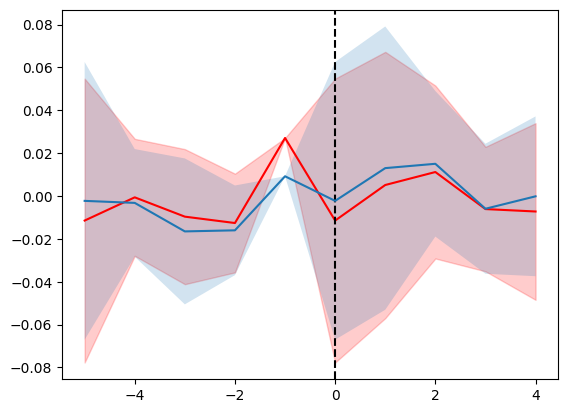

In [73]:
compute_log_returns(bad_ticker_history)
bad_response_function_mean, bad_response_function_std = compute_response_function(bad_ticker_history, 5, 5)
x = np.arange(-5, 5)
plt.plot(x, bad_response_function_mean, color='r')
plt.fill_between(x, np.array(bad_response_function_mean) - np.array(bad_response_function_std), np.array(bad_response_function_mean) + np.array(bad_response_function_std), alpha=0.2, color='r')
plt.axvline(x=0, color='k', linestyle='--')
compute_log_returns(good_ticker_history)
good_response_function_mean, good_response_function_std = compute_response_function(good_ticker_history, 5, 5)
x = np.arange(-5, 5)
plt.plot(x, good_response_function_mean)
plt.fill_between(x, np.array(good_response_function_mean) - np.array(good_response_function_std), np.array(good_response_function_mean) + np.array(good_response_function_std), alpha=0.2)


In [ ]:
bad_ticker_history

Adj Close                                           \
                         ADDYY       ADNT  AEHL      AHEXF  AHOTF   AIP   
Date                                                                      
2023-05-01 00:00:00  87.289146  36.810001  1.10  34.970001  1.820  3.85   
2023-05-02 00:00:00  87.328972  37.160000  1.14  34.970001  1.850  3.81   
2023-05-03 00:00:00  85.914978  34.320000  1.13  34.970001  1.850  3.99   
2023-05-04 00:00:00  86.641899  33.810001  1.13  34.970001  1.830  3.99   
2023-05-05 00:00:00  93.801476  34.759998  1.13  34.970001  1.900  4.69   
2023-05-08 00:00:00  93.333466  35.860001  1.14  34.970001  1.900  4.66   
2023-05-09 00:00:00  90.256538  35.360001  1.12  34.970001  1.868  4.67   

                                                           ... log_returns  \
                          AJX       ALCO       ALEX AMKBY  ...        WLKP   
Date                                                       ...               
2023-05-01 00:00:00  6.017143  23.690001  19.200001  9.06  ...         NaN   
2023-05-02 00:00:00  5.814643  23.549999  19.299999  8.89  ...   -0.004090   
2023-05-03 00:00:00  5.805000  23.500000  19.120001  8.80  ...   -0.005479   
2023-05-04 00:00:00  5.718214  22.820000  19.250000  8.69  ...   -0.029742   
2023-05-05 00:00:00  5.380714  23.490000  18.920000  8.81  ...    0.023772   
2023-05-08 00:00:00  5.342143  22.990000  18.450001  8.88  ...    0.001381   
2023-05-09 00:00:00  5.400000  23.320000  18.270000  8.74  ...   -0.007850   

                    trancript_date log_returns trancript_date log_returns  \
                              WLKP         WMC            WMC         WOW   
Date                                                                        
2023-05-01 00:00:00     2023-05-04         NaN     2023-05-05         NaN   
2023-05-02 00:00:00     2023-05-04   -0.049133     2023-05-05   -0.034350   
2023-05-03 00:00:00     2023-05-04    0.011919     2023-05-05    0.014235   
2023-05-04 00:00:00     2023-05-04   -0.022769     2023-05-05   -0.215005   
2023-05-05 00:00:00     2023-05-04    0.040386     2023-05-05   -0.064465   
2023-05-08 00:00:00     2023-05-04   -0.003499     2023-05-05   -0.029641   
2023-05-09 00:00:00     2023-05-04   -0.012934     2023-05-05   -0.036769   

                    trancript_date log_returns trancript_date log_returns  \
                               WOW        WRLD           WRLD        ZEUS   
Date                                                                        
2023-05-01 00:00:00     2023-05-04         NaN     2023-05-04         NaN   
2023-05-02 00:00:00     2023-05-04   -0.057707     2023-05-04   -0.005666   
2023-05-03 00:00:00     2023-05-04    0.029009     2023-05-04   -0.015695   
2023-05-04 00:00:00     2023-05-04    0.069334     2023-05-04   -0.060812   
2023-05-05 00:00:00     2023-05-04    0.062461     2023-05-04    0.047470   
2023-05-08 00:00:00     2023-05-04    0.029204     2023-05-04   -0.071146   
2023-05-09 00:00:00     2023-05-04   -0.058816     2023-05-04    0.016152   

                    trancript_date  
                              ZEUS  
Date                                
2023-05-01 00:00:00     2023-05-05  
2023-05-02 00:00:00     2023-05-05  
2023-05-03 00:00:00     2023-05-05  
2023-05-04 00:00:00     2023-05-05  
2023-05-05 00:00:00     2023-05-05  
2023-05-08 00:00:00     2023-05-05  
2023-05-09 00:00:00     2023-05-05  

[7 rows x 1272 columns]

<AxesSubplot: xlabel='Date'>

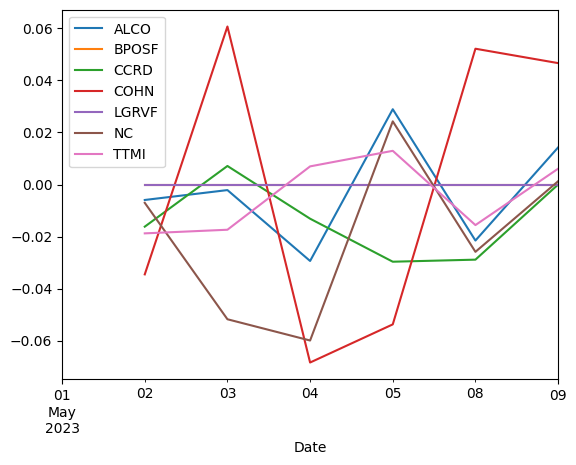

In [ ]:
compute_log_returns(worst_ticker_history)
worst_ticker_history["log_returns"].plot()

<AxesSubplot: xlabel='Date'>

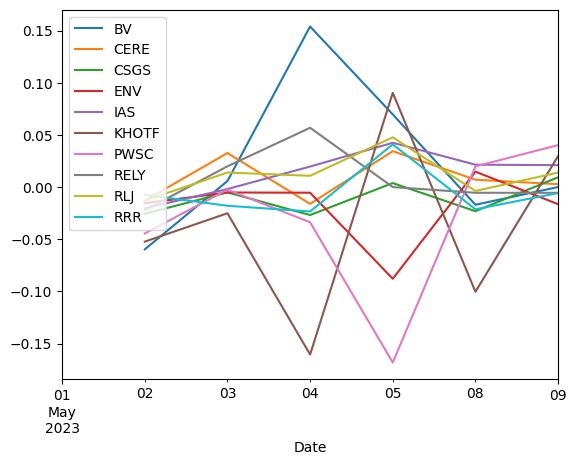

In [ ]:
compute_log_returns(best_ticker_history)
best_ticker_history["log_returns"].plot()